In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib agg

import jax
import jax.numpy as jnp
import visualization
from utils import results, experiments, settings, equioutput

In [2]:
result = results.ResultSample.load_from_file(
    #"/home/gw/data/experiments/master_thesis/results/6d186e013e95a2b671786ba446de554c.tar.gz"
    "/home/gw/data/experiments/master_thesis/results/6fad5c77c6e4fcd72601720d57bf25fb.tar.gz"
    #"/home/gw/data/experiments/master_thesis/results/2ea0f0a8a17bbe618255d2787e7e7230.tar.gz"
)
experiment = experiments.FactoryExperiment(result.experiment_type, **{"settings": result.settings})()

normalized probabilities: [0.5665243  0.3504857  0.08298998]


In [3]:
print(experiment._settings)

SettingsExperimentSample(output_path='/u/halle/wiese/home_at/data/experiments/master_thesis/results', dataset='sinusoidal', dataset_normalization='standardization', hidden_layers=2, hidden_neurons=3, activation='tanh', activation_last_layer='none', num_warmup=1024, statistic='reduced', statistic_p=0.99, samples_per_chain=1, identifiable_modes=3, pool_size=16, seed=0)


In [4]:
sequential_helper = equioutput.SequentialHelper(
    transformation=experiment._model_transformation,
    dataset=experiment._dataset
)
structured_sequential_samples_parameters = sequential_helper.structured_sequential_samples_parameters(
    samples_parameters=result.samples["parameters"]
)

In [5]:
symmetry_helper = equioutput.SymmetryHelper(structured_sequential_samples_parameters)

# initial status

In [6]:
subspace_0 = symmetry_helper.hidden_layer_subspace(layer=0)
subspace_1 = symmetry_helper.hidden_layer_subspace(layer=1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.55it/s]


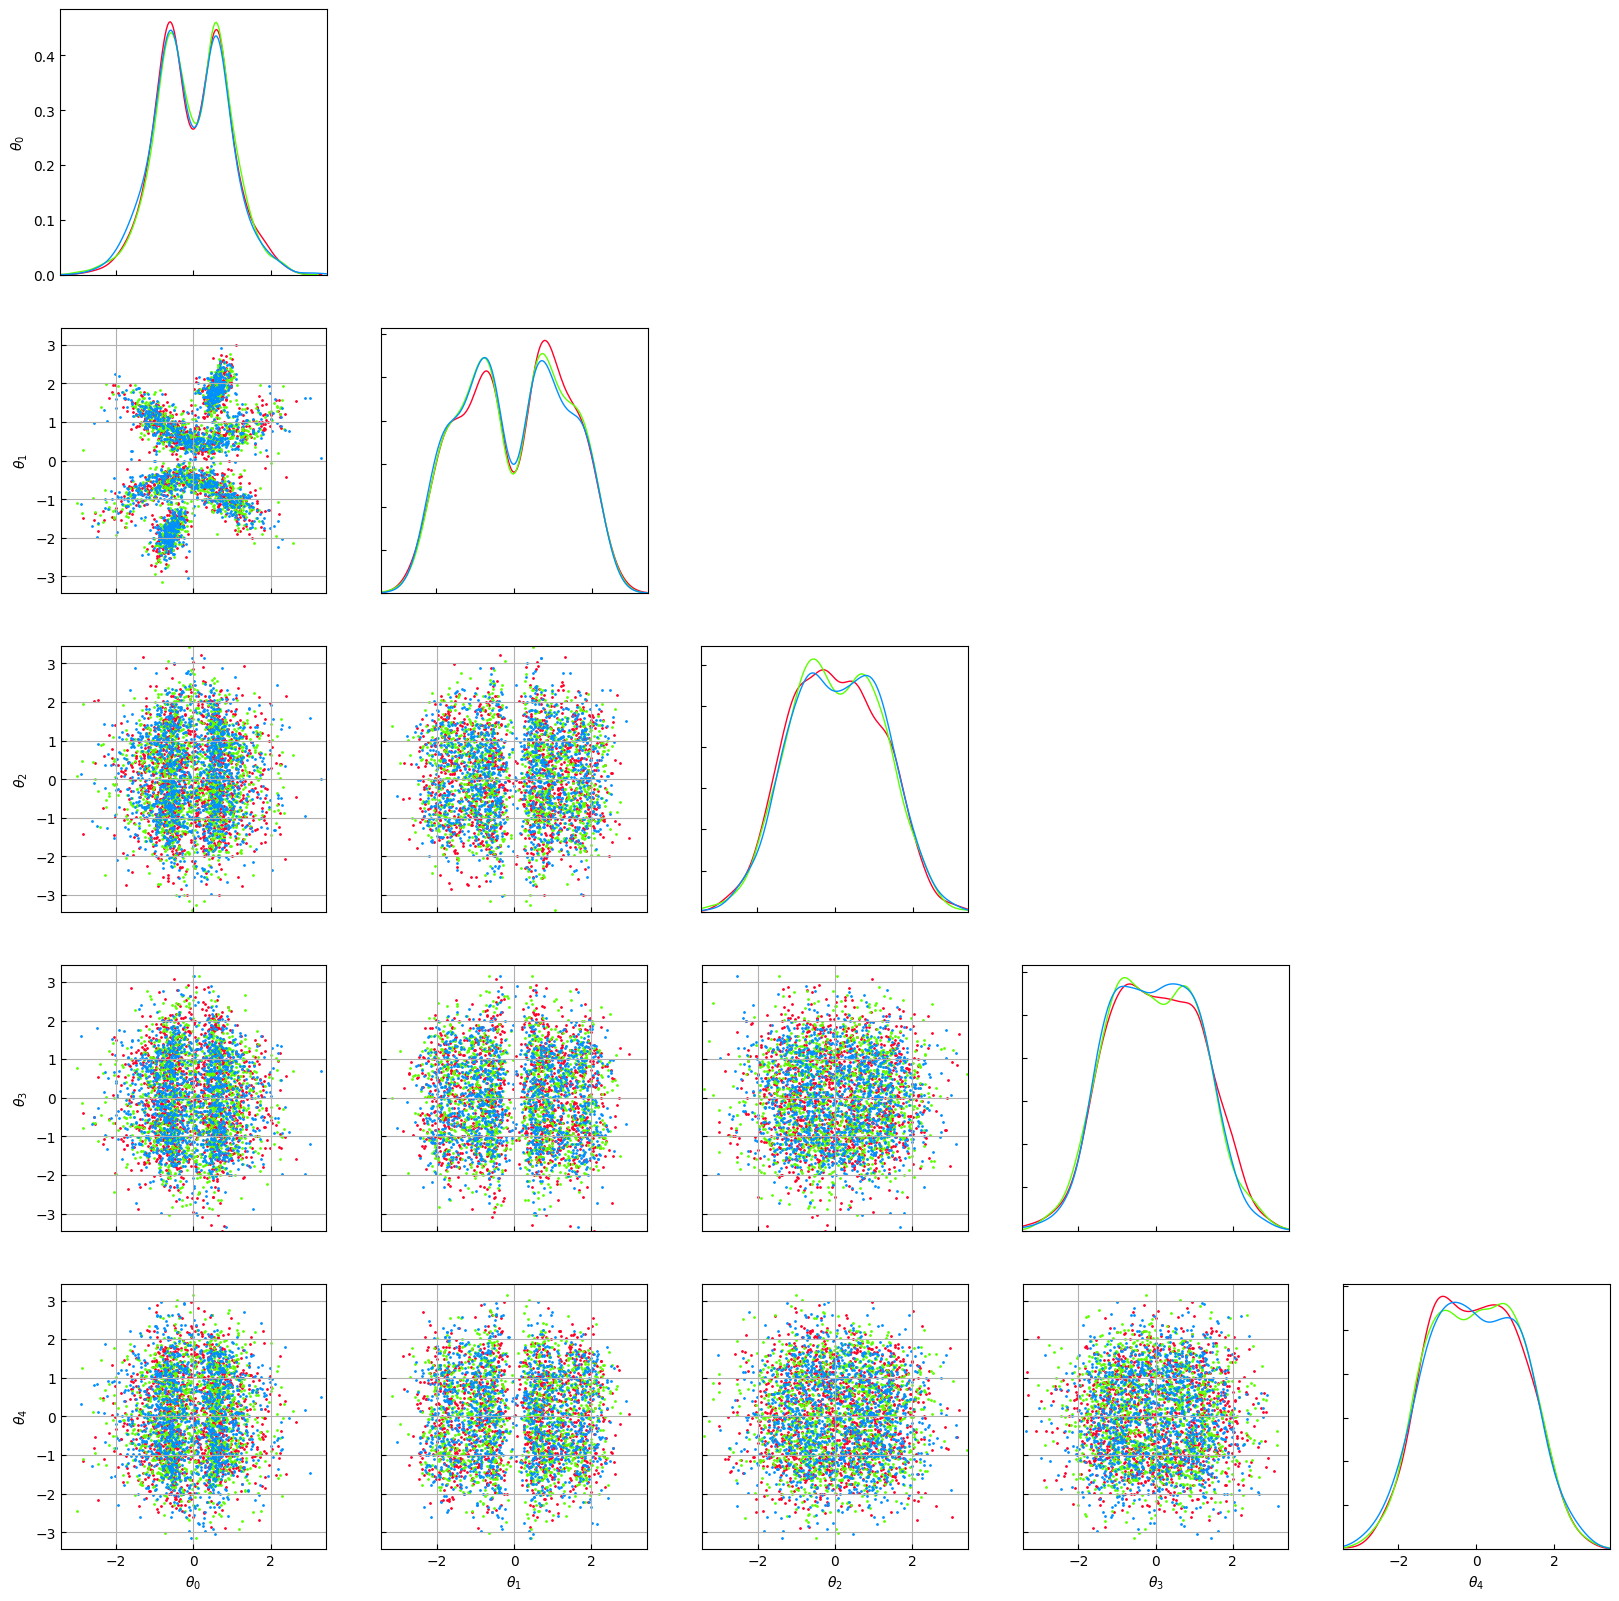

In [7]:
data_list = list(subspace_0.transpose(1, 0, 2))

figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=1.0,
            size=1.0
        )
    )
)
figure.plot(
    data_list=data_list
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.97it/s]


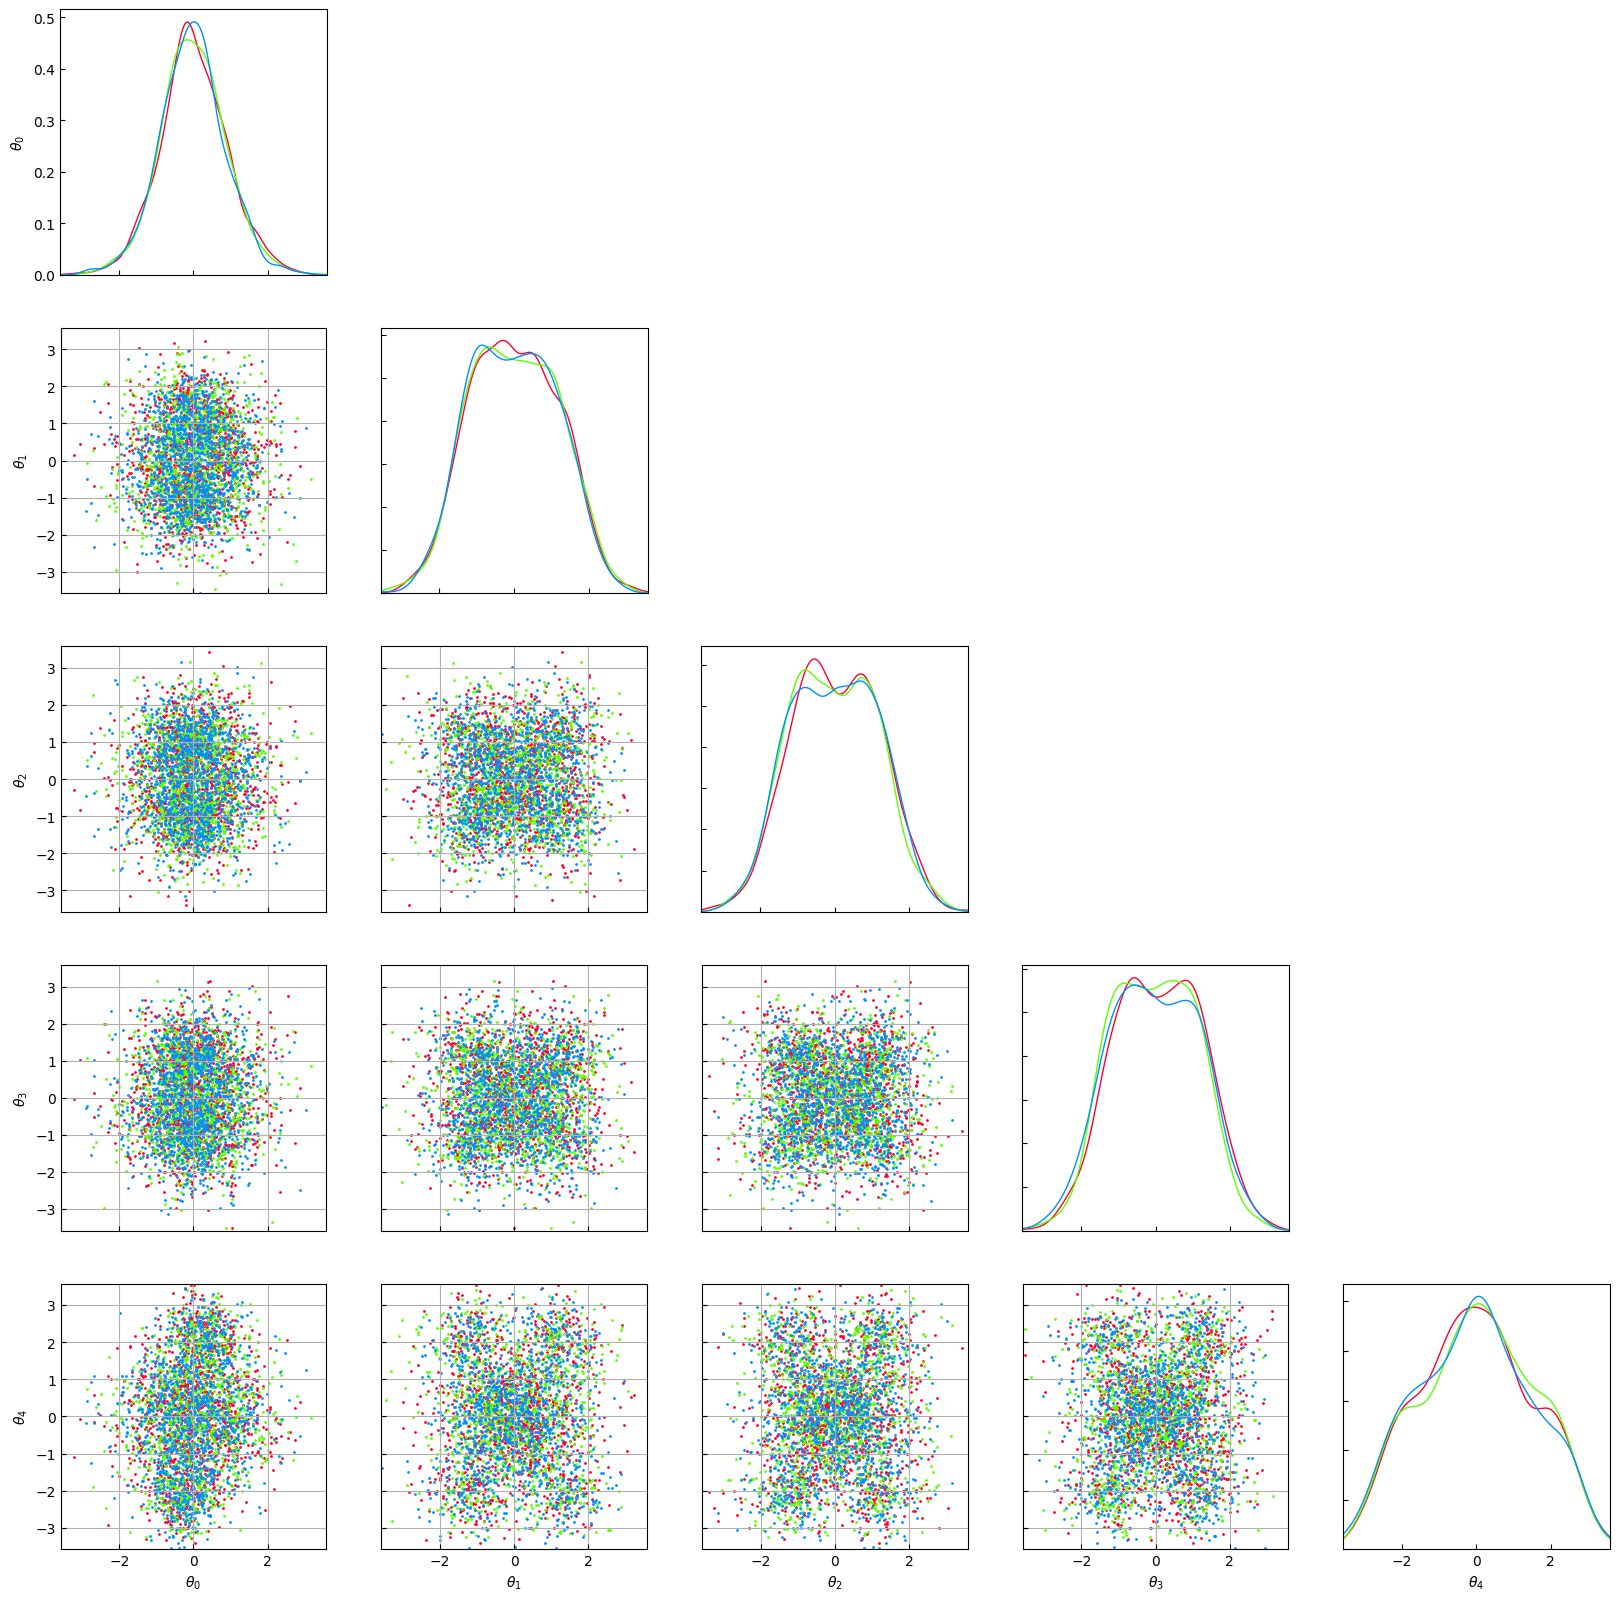

In [8]:
data_list = list(subspace_1.transpose(1, 0, 2))

figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=1.0,
            size=1.0
        )
    )
)
figure.plot(
    data_list=data_list
)

In [9]:
# remove symmetries layer 0
symmetry_helper.remove_tanh_symmetries(layer=0)

epoch: 0,  loss: 3.5331366062164307, normal l2 norm: 2.5353519916534424
epoch: 1,  loss: 4.623576641082764, normal l2 norm: 2.8286683559417725
epoch: 2,  loss: 3.9370131492614746, normal l2 norm: 2.0567986965179443
epoch: 3,  loss: 2.939471960067749, normal l2 norm: 1.87938392162323
epoch: 4,  loss: 2.882800817489624, normal l2 norm: 1.9593143463134766
epoch: 5,  loss: 2.835395574569702, normal l2 norm: 2.0537543296813965
epoch: 6,  loss: 2.813636064529419, normal l2 norm: 2.03840970993042
epoch: 7,  loss: 2.7617640495300293, normal l2 norm: 1.956342101097107
epoch: 8,  loss: 2.743877410888672, normal l2 norm: 2.011270761489868
epoch: 9,  loss: 2.7339677810668945, normal l2 norm: 1.9292165040969849
epoch: 10,  loss: 2.718341827392578, normal l2 norm: 1.9017401933670044
epoch: 11,  loss: 2.716714382171631, normal l2 norm: 1.9150022268295288
epoch: 12,  loss: 2.7049038410186768, normal l2 norm: 1.9406211376190186
epoch: 13,  loss: 2.701115131378174, normal l2 norm: 1.8825414180755615
epo

In [10]:
symmetry_helper._similarity_matrix = None
symmetry_helper.remove_permutation_symmetries(layer=0, iterations=256)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3822/3822 [00:14<00:00, 257.90it/s]


0 2509
1 1769
2 1300
3 996
4 779
5 622
6 542
7 495
8 411
9 384
10 333
11 270
12 266
13 252
14 235
15 224
16 198
17 200
18 221
19 206
20 203
21 206
22 195
23 203
24 183
25 172
26 160
27 128
28 120
29 118
30 93
31 100
32 86
33 61
34 70
35 73
36 66
37 74
38 54
39 58
40 54
41 54
42 52
43 61
44 49
45 47
46 44
47 38
48 40
49 38
50 36
51 35
52 26
53 20
54 30
55 27
56 27
57 26
58 28
59 31
60 29
61 25
62 24
63 20
64 17
65 25
66 25
67 23
68 15
69 19
70 21
71 15
72 14
73 14
74 13
75 16
76 21
77 31
78 28
79 33
80 25
81 26
82 19
83 15
84 17
85 14
86 16
87 24
88 18
89 18
90 14
91 27
92 31
93 28
94 32
95 33
96 43
97 41
98 35
99 39
100 29
101 28
102 36
103 41
104 43
105 50
106 54
107 54
108 67
109 81
110 95
111 96
112 93
113 93
114 91
115 100
116 105
117 98
118 113
119 85
120 94
121 74
122 69
123 50
124 41
125 32
126 30
127 20
128 16
129 16
130 9
131 6
132 3
133 2
134 2
135 2
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
1

In [ ]:
# TODO: Maybe Spectral Classification greedy variant?

In [11]:
subspace_0 = symmetry_helper.hidden_layer_subspace(layer=0)
subspace_1 = symmetry_helper.hidden_layer_subspace(layer=1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.06it/s]


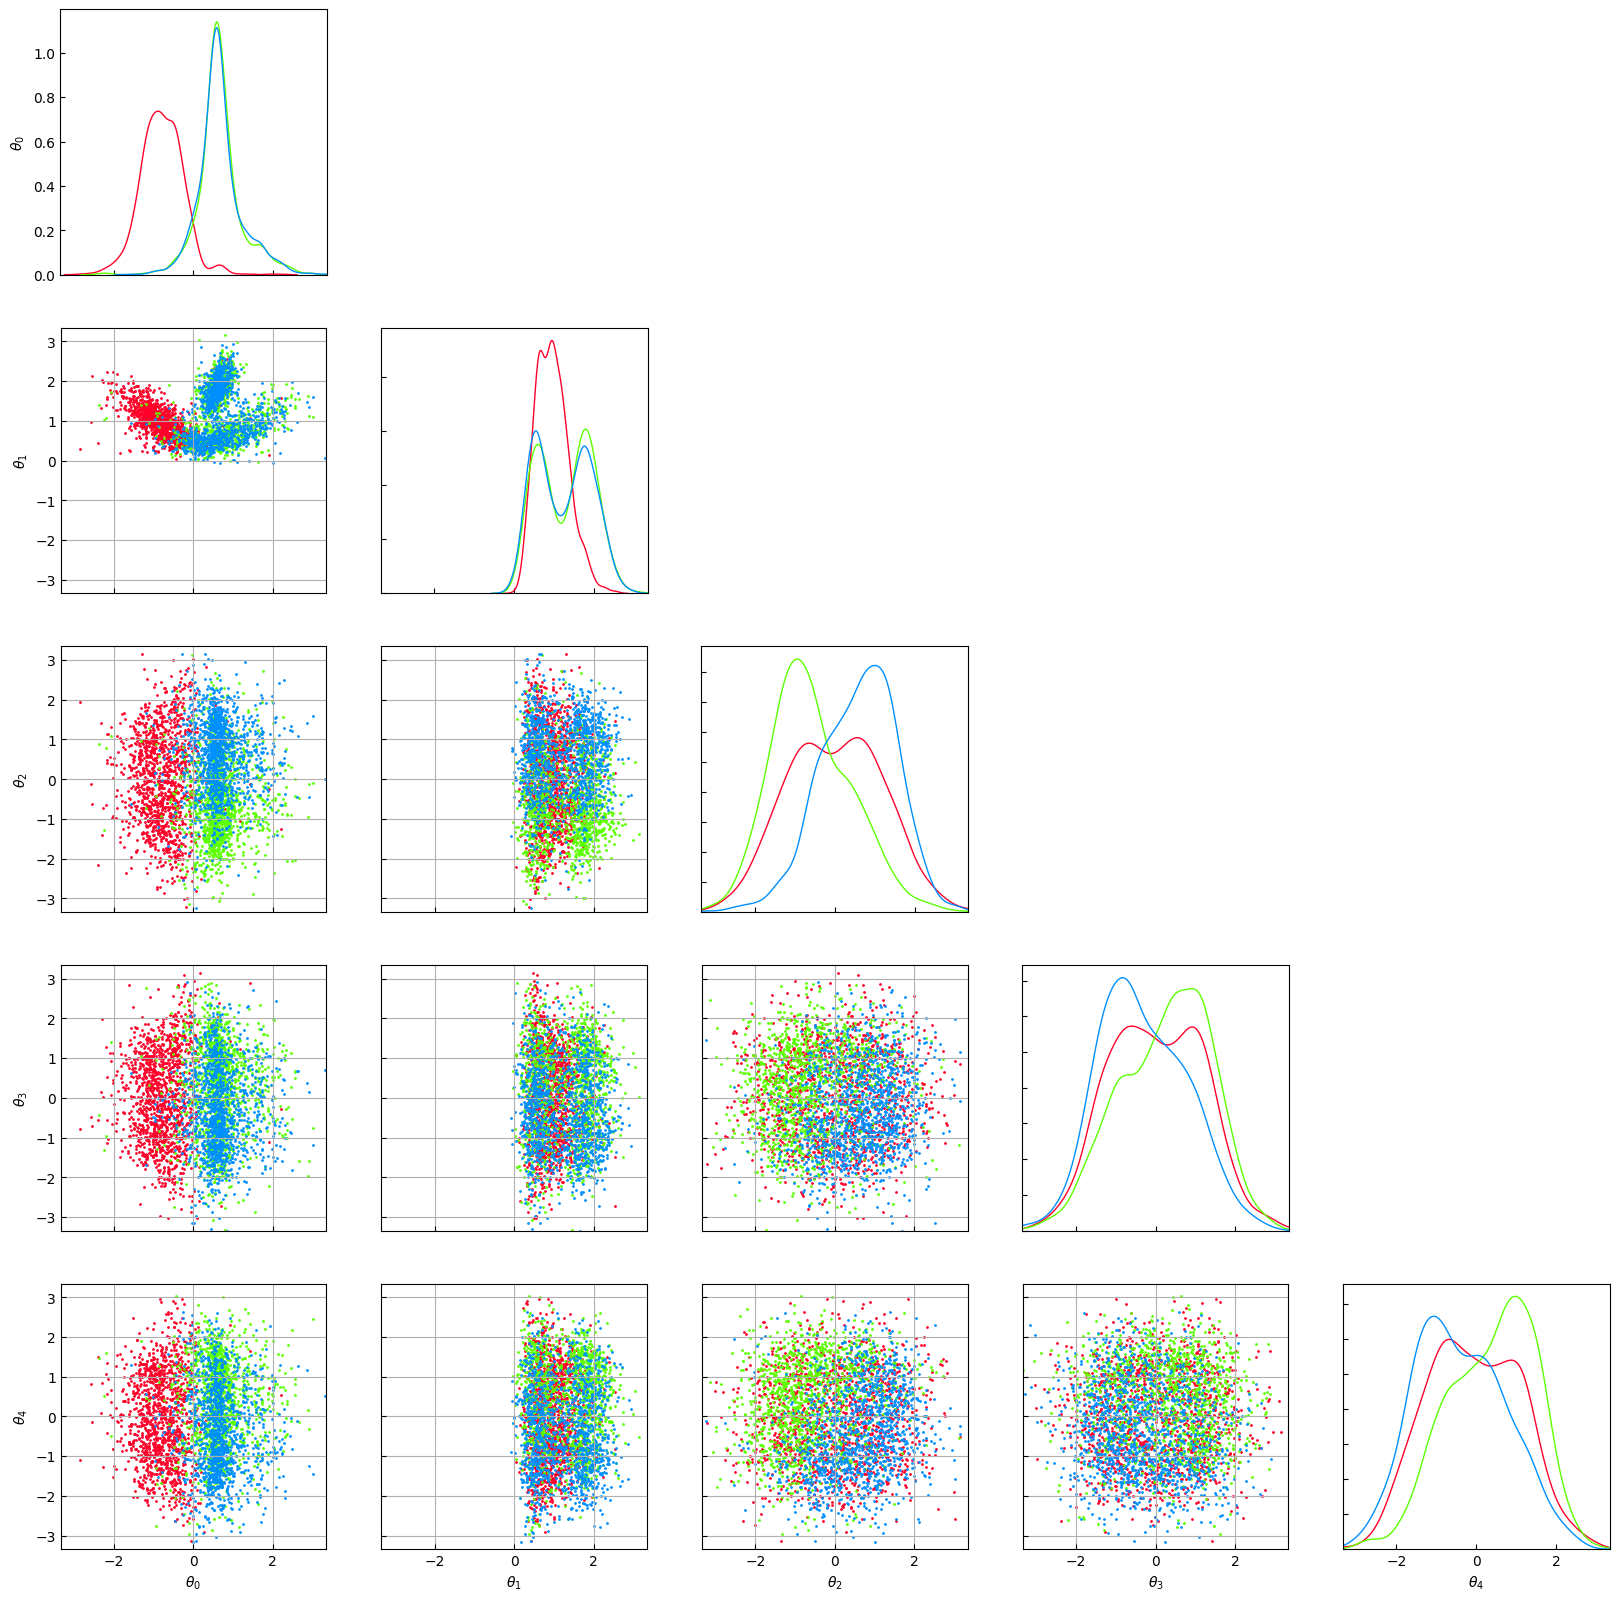

In [12]:
data_list = list(subspace_0.transpose(1, 0, 2))

figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=1.0,
            size=1.0
        )
    )
)
figure.plot(
    data_list=data_list
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.67it/s]


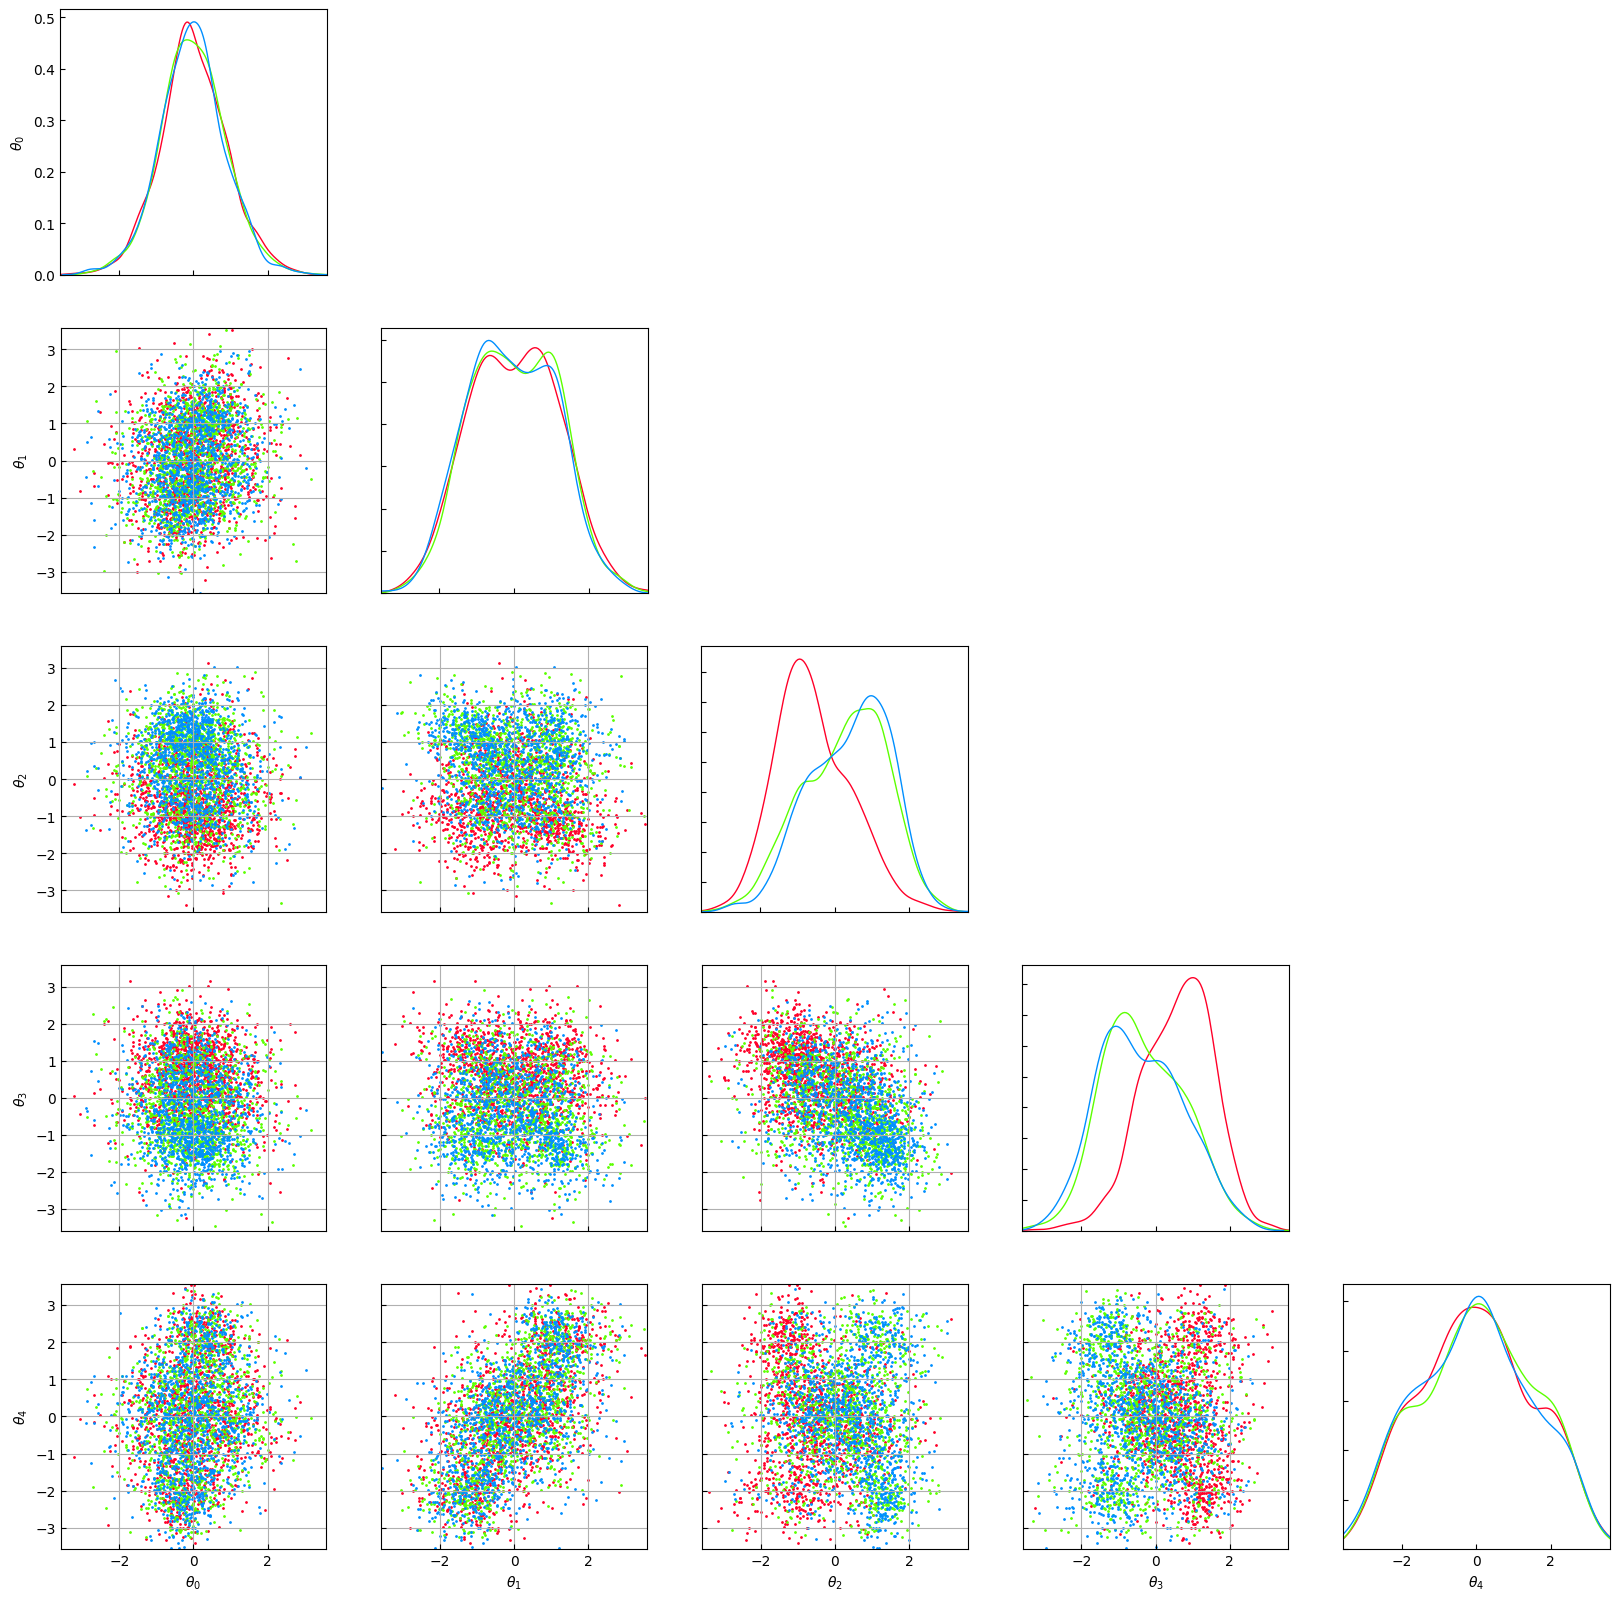

In [13]:
data_list = list(subspace_1.transpose(1, 0, 2))

figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=1.0,
            size=1.0
        )
    )
)
figure.plot(
    data_list=data_list
)

# permutation symmetry removal